In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
ecommerce_data = pd.read_csv("/Users/dongyuqing/Downloads/ECommerce_consumer behaviour.csv")
df = ecommerce_data.copy()
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [19]:
df.describe

<bound method NDFrame.describe of          order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         2425083    49125             1          2                 18   
1         2425083    49125             1          2                 18   
2         2425083    49125             1          2                 18   
3         2425083    49125             1          2                 18   
4         2425083    49125             1          2                 18   
...           ...      ...           ...        ...                ...   
2019496   3390742   199430            16          3                 18   
2019497    458285   128787            42          2                 19   
2019498    458285   128787            42          2                 19   
2019499    458285   128787            42          2                 19   
2019500    458285   128787            42          2                 19   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \


In [20]:
df.shape

(2019501, 12)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [22]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

In [23]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [24]:
df['department_id'].nunique()

21

In [25]:
df['order_id'].nunique()   

200000

In [26]:
df['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [27]:
for column_name in df:
    if df[column_name].dtype == 'float64':
        df[column_name].fillna(value=-1, inplace=True)

In [28]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [29]:
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


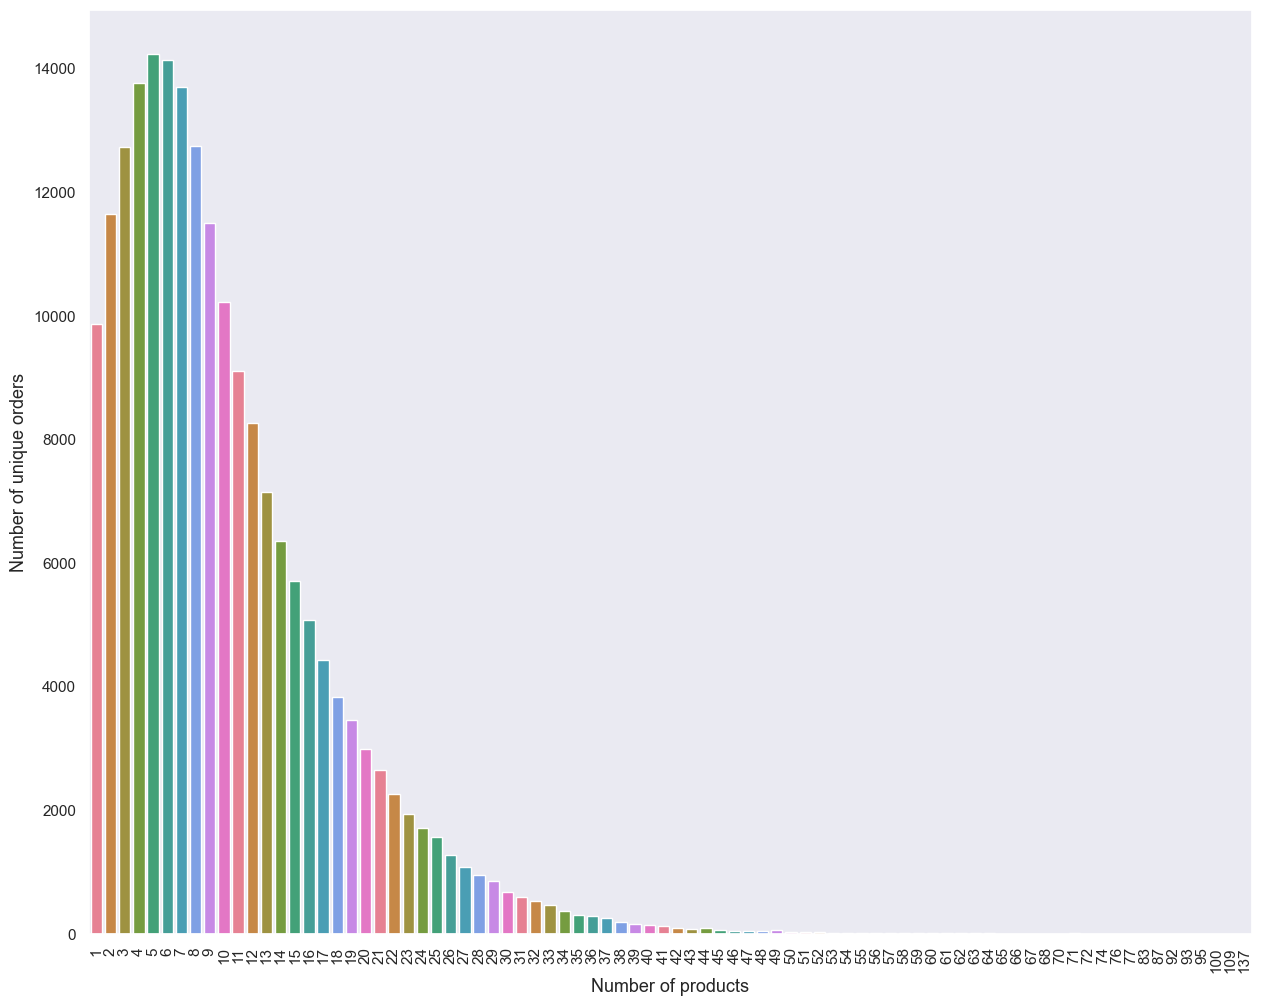

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the maximum 'add_to_cart_order' for each 'order_id' and count their frequencies
max_add_to_cart_order = df.groupby('order_id')['add_to_cart_order'].max()
order_counts = max_add_to_cart_order.value_counts()
sns.set(style='dark')

# Create the plot
fig, axis = plt.subplots(figsize=(15, 12))
axis = sns.barplot(x=order_counts.index, y=order_counts.values, palette=sns.color_palette("husl", 10))

# Set the labels and rotate x-ticks for better readability
axis.set_xlabel('Number of products', fontsize=13)
axis.set_ylabel('Number of unique orders', fontsize=13)
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [32]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Convert data into a list of transactions
transactions = df.groupby('order_id')['product_name'].apply(list)

# Transform transaction data into a format suitable for the Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
# Create a new DataFrame to store the transformed data, instead of overwriting the original df
transformed_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transformed_df, min_support=0.05, use_colnames=True, low_memory=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Display the association rules and frequent itemsets
print(rules.head())
print(frequent_itemsets.head())


          antecedents         consequents  antecedent support  \
0      (fresh fruits)             (bread)            0.555995   
1             (bread)      (fresh fruits)            0.163865   
2             (bread)  (fresh vegetables)            0.163865   
3  (fresh vegetables)             (bread)            0.444360   
4              (milk)             (bread)            0.243325   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.163865  0.112410    0.202178  1.233809  0.021302    1.048022   
1            0.555995  0.112410    0.685992  1.233809  0.021302    1.413990   
2            0.444360  0.091590    0.558936  1.257844  0.018775    1.259771   
3            0.163865  0.091590    0.206117  1.257844  0.018775    1.053222   
4            0.163865  0.059705    0.245371  1.497400  0.019833    1.108009   

   zhangs_metric  
0       0.426801  
1       0.226640  
2       0.245163  
3       0.368924  
4       0.438994  
    support         

In [33]:
top_reordered_products = (
    df.groupby(['product_id', 'product_name', 'department'], as_index=False)
    .agg({'reordered': 'size'})  
    .nlargest(15, 'reordered')   
)

top_reordered_products

,product_id,product_name,department,reordered
23,24,fresh fruits,produce,226039
82,83,fresh vegetables,produce,212611
122,123,packaged vegetables fruits,produce,109596
119,120,yogurt,dairy eggs,90751
20,21,packaged cheese,dairy eggs,61502
83,84,milk,dairy eggs,55150
114,115,water seltzer sparkling water,beverages,52564
106,107,chips pretzels,snacks,45306
90,91,soy lactosefree,dairy eggs,39389
111,112,bread,bakery,36381


In [34]:
summed_reordered = (
    top_reordered_products.groupby('product_name', as_index=False)
    .agg({'reordered': 'sum'})
    .sort_values('reordered', ascending=False)
    .set_index('product_name')
)
summed_reordered

,reordered
product_name,
fresh fruits,226039
fresh vegetables,212611
packaged vegetables fruits,109596
yogurt,90751
packaged cheese,61502
milk,55150
water seltzer sparkling water,52564
chips pretzels,45306
soy lactosefree,39389


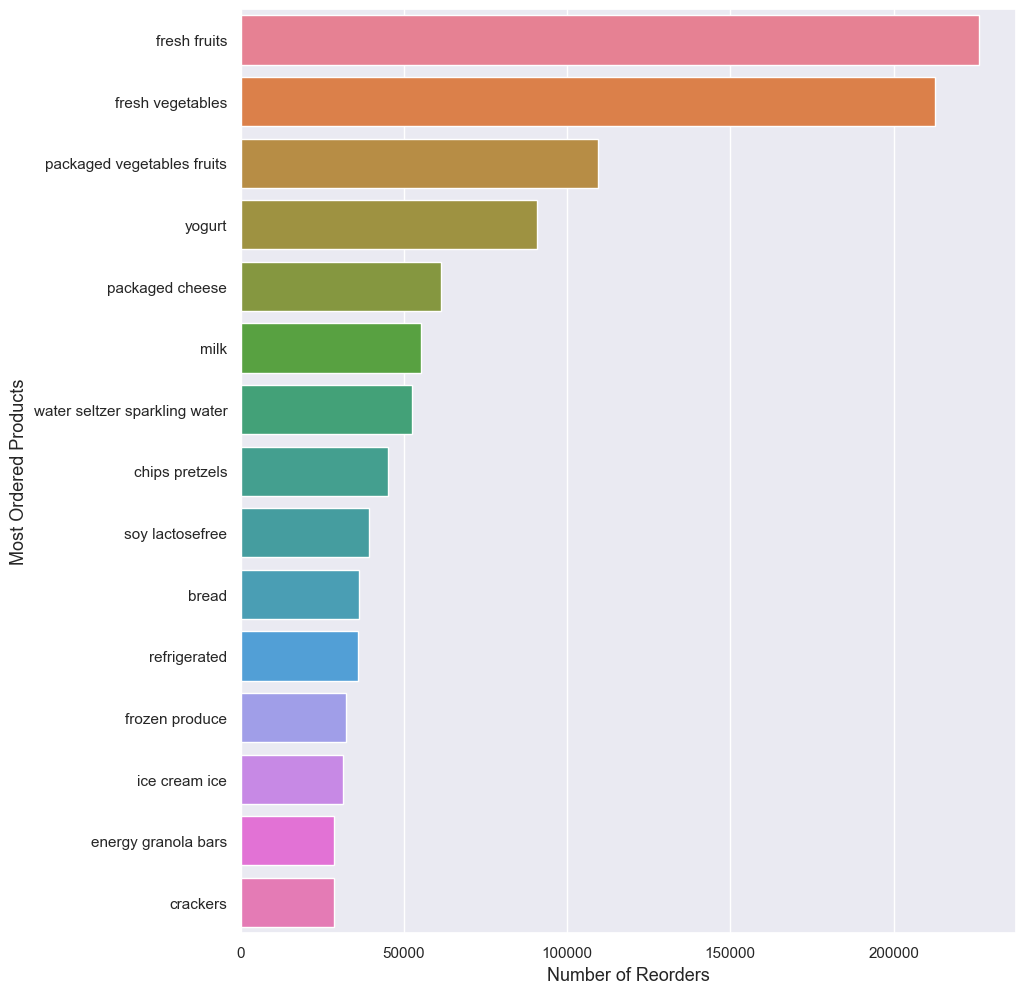

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(10, 12)) 
palette_colors = sns.color_palette("husl", len(summed_reordered))
sns.barplot(x=summed_reordered['reordered'], y=summed_reordered.index, palette=palette_colors)
plt.xlabel('Number of Reorders', fontsize=13) 
plt.ylabel('Most Ordered Products', fontsize=13)  
plt.show()

In [36]:
reordered_count = df['product_id'].groupby(df['reordered']).count()
reordered_df = pd.DataFrame(reordered_count).reset_index()
reordered_df.columns = ['reordered', 'product_count']
total_count = reordered_df['product_count'].sum()
reordered_df['Ratio'] = reordered_df['product_count'] / total_count
reordered_df

,reordered,product_count,Ratio
0,0,828515,0.410257
1,1,1190986,0.589743


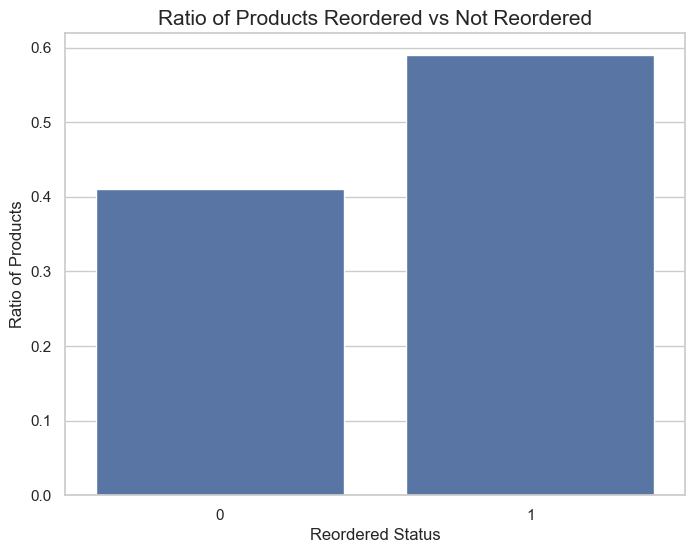

In [37]:
# Set the style for the plot
sns.set_style('whitegrid')

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='reordered', y='Ratio', data=reordered_df)

# Set labels and title
plt.xlabel('Reordered Status', fontsize=12)
plt.ylabel('Ratio of Products', fontsize=12)
plt.title('Ratio of Products Reordered vs Not Reordered', fontsize=15)

# Display the plot
plt.show()


In [38]:
grouped_df = df.groupby(['user_id', 'department']).size()

# Unstack the grouped DataFrame to create a matrix similar to a crosstab
unstacked_df = grouped_df.unstack(fill_value=0)

# Display the result
unstacked_df

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
206206,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4


In [39]:
from sklearn.cluster import KMeans
data = unstacked_df.values

Explained variance ratio (first three components): [0.59064731 0.1373943  0.06764514]


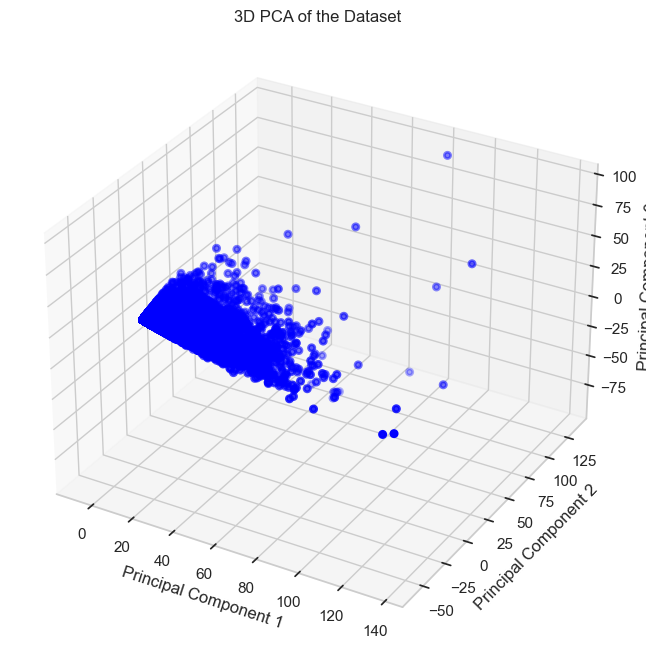

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA and reduce to three dimensions for 3D visualization
pca = PCA(n_components=3, random_state=100)
X_reduced = pca.fit_transform(data)

# Explained variance ratio for each component
print('Explained variance ratio (first three components):', pca.explained_variance_ratio_)

# 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each point in 3D PCA space
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], color='blue', lw=2)

ax.set_title('3D PCA of the Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show the plot
plt.show()

Total variance explained by all components: 1.00
95% of variance is explained by the first 10 components
Variance explained by the first 4 components: 0.84
Variance explained by the first 6 components: 0.90
Variance explained by the first 8 components: 0.93
Variance explained by the first 9 components: 0.94
Variance explained by the first 10 components: 0.95
Variance explained by the first 14 components: 0.99
Variance explained by the first 21 components: 1.00


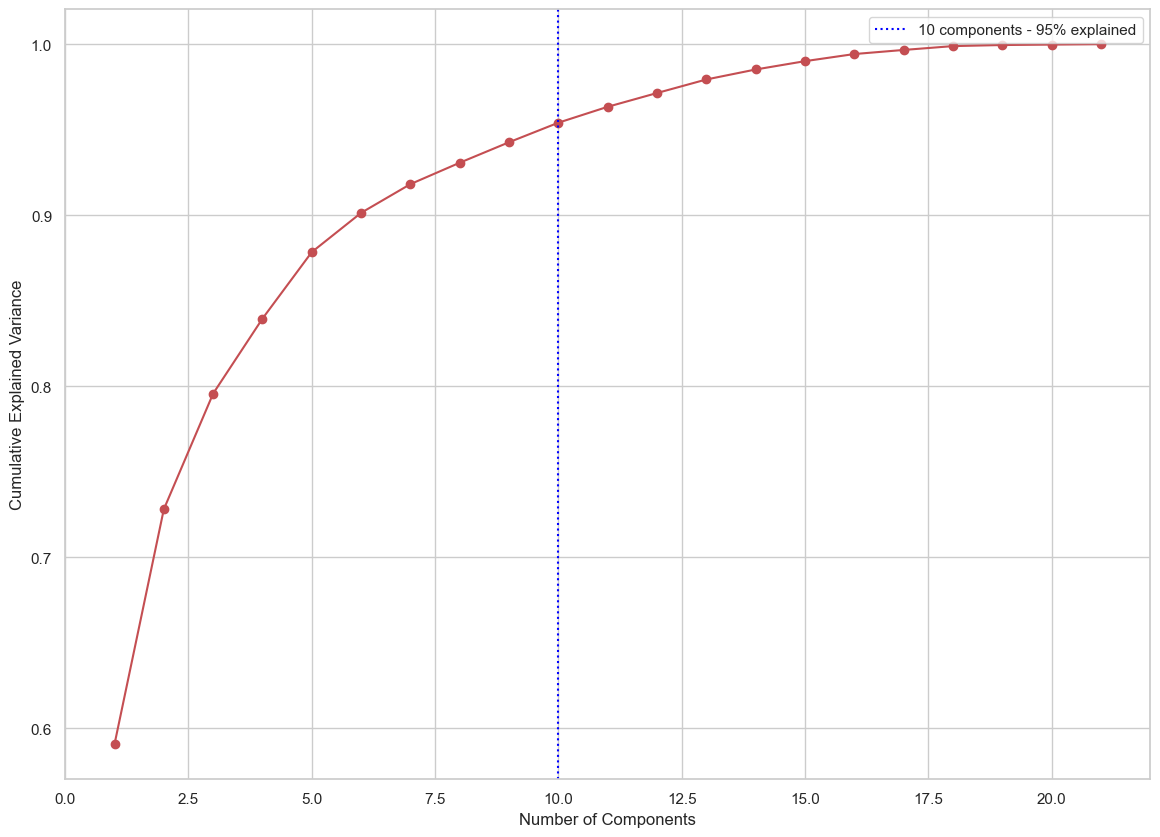

In [42]:
from sklearn.decomposition import PCA

pca = PCA(random_state=100)
pca.fit(data)
explained_var_ratios = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(explained_var_ratios)

# Find the minimum number of principal components that explain more than 95% of the variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Output the total variance explained by all components and the number of components needed for 95% explanation
print(f"Total variance explained by all components: {cumulative_explained_variance[-1]:.2f}")
print(f"95% of variance is explained by the first {n_components_95} components")

# Create a DataFrame to display the explained variance of each principal component
explained_variance_df = pd.DataFrame({
    'Component': np.arange(1, len(explained_var_ratios) + 1),
    'Explained Variance': explained_var_ratios
})

# Output the explained variance for the first few principal components
for i in [4, 6, 8, 9, 10, 14, 21]:
    variance = explained_variance_df['Explained Variance'][:i].sum()
    print(f"Variance explained by the first {i} components: {variance:.2f}")

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(14, 10))
plt.plot(explained_variance_df['Component'], cumulative_explained_variance, marker='o', color='r')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Annotate the graph with the number of components needed for 95% variance explanation
plt.axvline(x=n_components_95, linestyle=':', color='blue', label=f'{n_components_95} components - 95% explained')
plt.legend()

# Display the plot
plt.show()


The inertia for 2 clusters is: 6996449.421090804
The silhouette score for 2 clusters is: 0.5873351006085681
The Davies-Bouldin score for 2 clusters is: 0.9844217782952432
The inertia for 3 clusters is: 5737926.380985741
The silhouette score for 3 clusters is: 0.4249392176080169
The Davies-Bouldin score for 3 clusters is: 1.2083340934453897
The inertia for 4 clusters is: 5184860.415506901
The silhouette score for 4 clusters is: 0.3241793850151687
The Davies-Bouldin score for 4 clusters is: 1.4238298066969877
The inertia for 5 clusters is: 4734340.565148594
The silhouette score for 5 clusters is: 0.3067227238103458
The Davies-Bouldin score for 5 clusters is: 1.424720552578719
The inertia for 6 clusters is: 4449279.710527476
The silhouette score for 6 clusters is: 0.3045793165286739
The Davies-Bouldin score for 6 clusters is: 1.5529172342467268
The inertia for 7 clusters is: 4216314.795871796
The silhouette score for 7 clusters is: 0.25281209855775116
The Davies-Bouldin score for 7 cluste

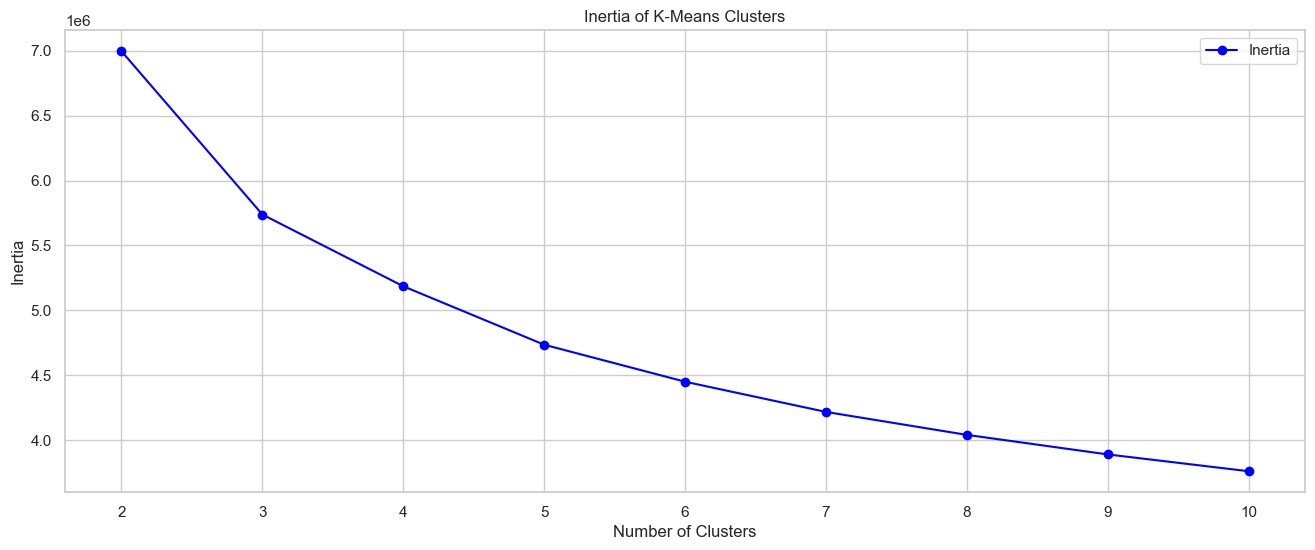

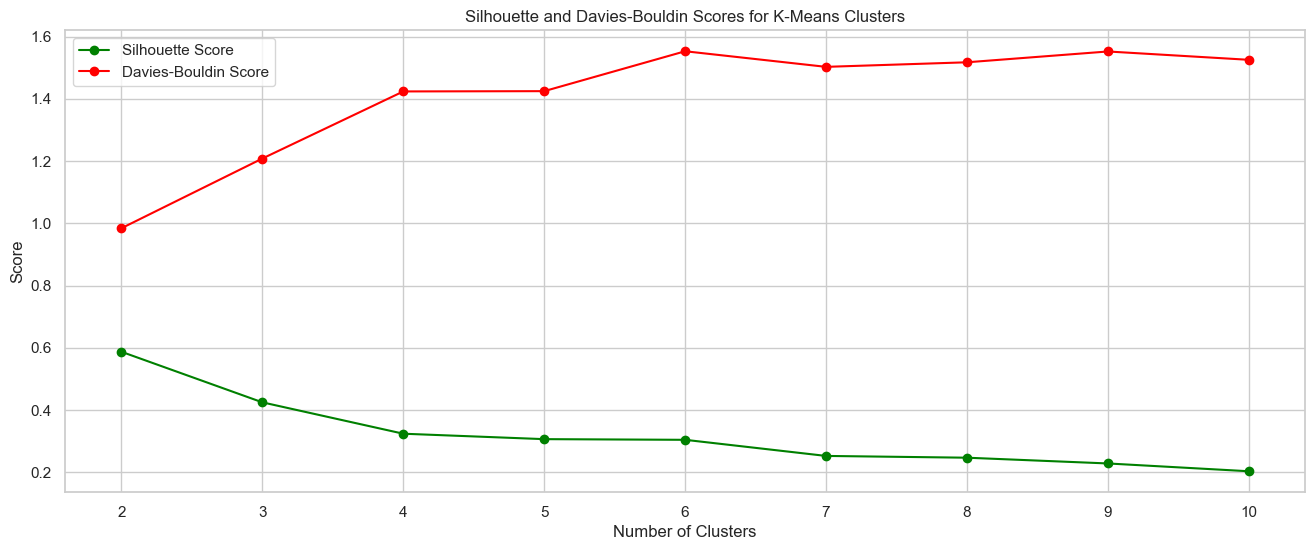

In [43]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Apply PCA
pca = PCA(n_components=10, random_state=100)
X_reduced = pca.fit_transform(data)

# Define the range of number of clusters to explore
no_of_clusters = range(2, 11)

# Initialize lists to store the metrics
kmeans_inertia = []
kmeans_silhouette_scores = []
kmeans_davies_bouldin_scores = []

# Iterate over the defined range of clusters
for f in no_of_clusters:
    # Fit KMeans
    kmeans = KMeans(n_clusters=f, random_state=10).fit(X_reduced)
    
    # Append inertia and silhouette scores to the correct lists
    kmeans_inertia.append(kmeans.inertia_)
    kmeans_silhouette_scores.append(silhouette_score(X_reduced, kmeans.labels_))
    
    # Calculate and append Davies-Bouldin scores to the correct lists
    kmeans_davies_bouldin_scores.append(davies_bouldin_score(X_reduced, kmeans.labels_))
    
    # Print inertia, silhouette, and Davies-Bouldin scores
    print(f"The inertia for {f} clusters is: {kmeans_inertia[-1]}")
    print(f"The silhouette score for {f} clusters is: {kmeans_silhouette_scores[-1]}")
    print(f"The Davies-Bouldin score for {f} clusters is: {kmeans_davies_bouldin_scores[-1]}")

# First plot for Inertia
plt.figure(figsize=(16, 6))
plt.plot(list(no_of_clusters), kmeans_inertia, marker='o', linestyle='-', color='blue', label='Inertia')
plt.title('Inertia of K-Means Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(list(no_of_clusters))
plt.legend()
plt.grid(True)
plt.show()

# Second plot for Silhouette and Davies-Bouldin Scores
plt.figure(figsize=(16, 6))
plt.plot(list(no_of_clusters), kmeans_silhouette_scores, marker='o', linestyle='-', color='green', label='Silhouette Score')
plt.plot(list(no_of_clusters), kmeans_davies_bouldin_scores, marker='o', linestyle='-', color='red', label='Davies-Bouldin Score')
plt.title('Silhouette and Davies-Bouldin Scores for K-Means Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(list(no_of_clusters))
plt.legend()
plt.grid(True)
plt.show()


The silhouette score for 2 clusters in GMM is: 0.3735100784803686
The Davies-Bouldin score for 2 clusters in GMM is: 1.7703676375780215
The silhouette score for 3 clusters in GMM is: 0.03173571930200458
The Davies-Bouldin score for 3 clusters in GMM is: 2.2550584360378436
The silhouette score for 4 clusters in GMM is: -0.027553665700872056
The Davies-Bouldin score for 4 clusters in GMM is: 3.0407700469229564
The silhouette score for 5 clusters in GMM is: -0.04049945538786091
The Davies-Bouldin score for 5 clusters in GMM is: 3.2767451622468875
The silhouette score for 6 clusters in GMM is: -0.08264737010951072
The Davies-Bouldin score for 6 clusters in GMM is: 4.152867642730346
The silhouette score for 7 clusters in GMM is: -0.07914621641820321
The Davies-Bouldin score for 7 clusters in GMM is: 5.4847123909979905
The silhouette score for 8 clusters in GMM is: -0.0906276652523027
The Davies-Bouldin score for 8 clusters in GMM is: 4.271432517009819
The silhouette score for 9 clusters in 

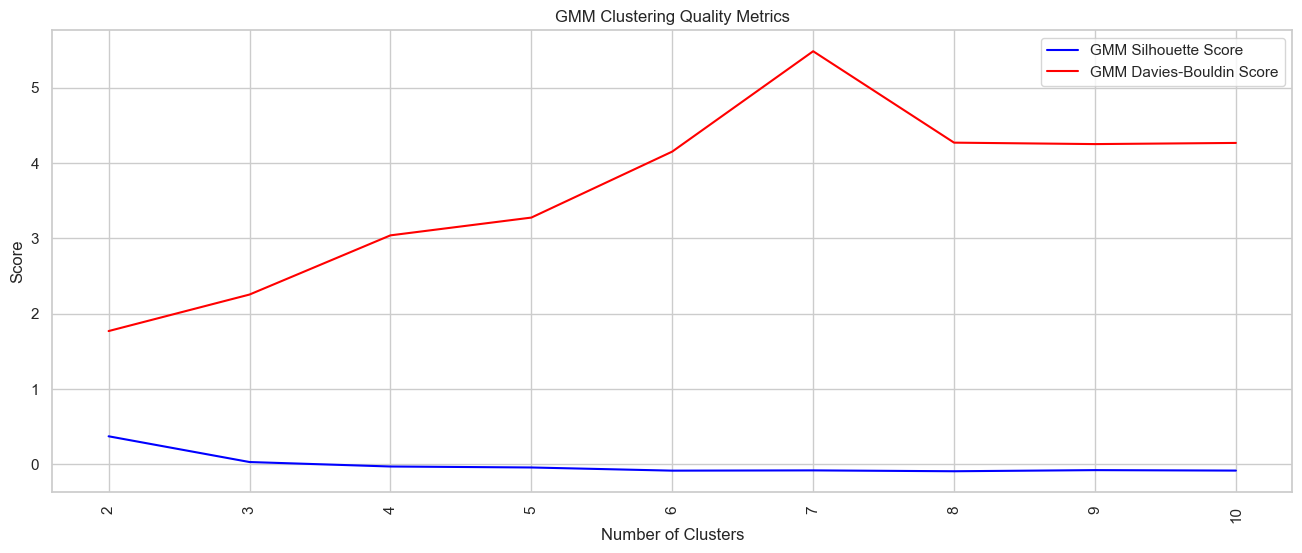

In [202]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

# PCA transformation
pca = PCA(n_components=10, random_state=100)
X_reduced = pca.fit_transform(data)

# Define the range of cluster numbers to explore
no_of_clusters = range(2, 11)

# Initialize lists to store the metrics
gmm_silhouette_scores = []
gmm_davies_bouldin_scores = []

# Run GMM and calculate metrics
for f in no_of_clusters:
    gmm = GaussianMixture(n_components=f, random_state=2).fit(X_reduced)
    gmm_labels = gmm.predict(X_reduced)
    gmm_silhouette_scores.append(silhouette_score(X_r, gmm_labels))
    gmm_davies_bouldin_scores.append(davies_bouldin_score(X_reduced, gmm_labels))
    
    print(f"The silhouette score for {f} clusters in GMM is: {gmm_silhouette_scores[-1]}")
    print(f"The Davies-Bouldin score for {f} clusters in GMM is: {gmm_davies_bouldin_scores[-1]}")

# Create a plot to visualize the GMM silhouette and Davies-Bouldin scores
fig, ax1 = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, gmm_silhouette_scores, label='GMM Silhouette Score', color='blue')
ax1.plot(xx, gmm_davies_bouldin_scores, label='GMM Davies-Bouldin Score', color='red')

ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title("GMM Clustering Quality Metrics")
plt.legend()
plt.show()


EPS: 1 - Clusters: 75 - Silhouette Score: -0.48424157013776215, Davies-Bouldin Score: 1.5696510585538903
EPS: 2 - Clusters: 50 - Silhouette Score: -0.15164568232165168, Davies-Bouldin Score: 1.6829631701794432
EPS: 3 - Clusters: 32 - Silhouette Score: 0.08699862701429789, Davies-Bouldin Score: 1.7677409931125327
EPS: 4 - Clusters: 16 - Silhouette Score: 0.3204547481405853, Davies-Bouldin Score: 1.880461150275837
EPS: 5 - Clusters: 10 - Silhouette Score: 0.30989627983500906, Davies-Bouldin Score: 1.6846368879187665


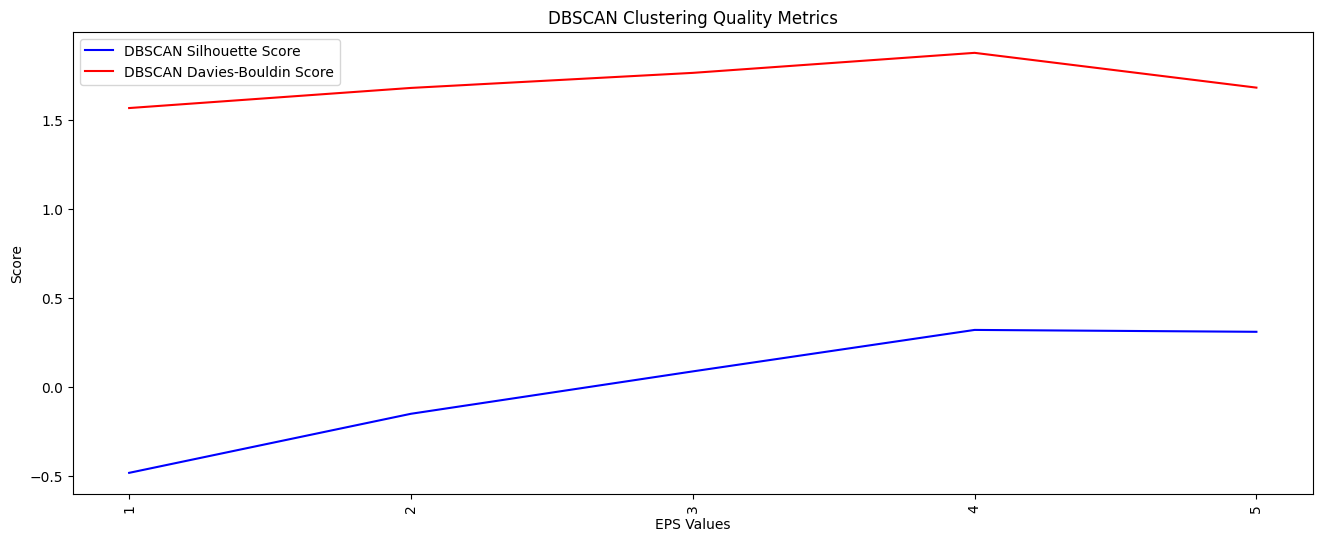

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Dimensionality reduction with PCA
pca = PCA(n_components=10, random_state=100)
X_reduced = pca.fit_transform(data)

# Define a range of EPS values for DBSCAN clustering
eps_values = np.arange(1, 6, 1)  # This range can be adjusted based on the characteristics of the data
db_silhouette_scores = []
db_davies_bouldin_scores = []
num_clusters = []

# Run DBSCAN and calculate metrics
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_reduced)
    
    # Exclude cases where all points are assigned as noise
    if len(set(dbscan_labels)) > 1:
        silhouette_avg = silhouette_score(X_reduced, dbscan_labels)
        davies_bouldin_avg = davies_bouldin_score(X_reduced, dbscan_labels)
        db_silhouette_scores.append(silhouette_avg)
        db_davies_bouldin_scores.append(davies_bouldin_avg)
        num_clusters.append(len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))
    else:
        db_silhouette_scores.append(np.nan)
        db_davies_bouldin_scores.append(np.nan)
        num_clusters.append(0)

    print(f"EPS: {eps} - Clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)} - Silhouette Score: {silhouette_avg if len(set(dbscan_labels)) > 1 else 'N/A'}, Davies-Bouldin Score: {davies_bouldin_avg if len(set(dbscan_labels)) > 1 else 'N/A'}")

# Create a chart to visualize DBSCAN's silhouette scores and Davies-Bouldin scores
fig, ax1 = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(eps_values))
ax1.plot(xx, db_silhouette_scores, label='DBSCAN Silhouette Score', color='blue')
ax1.plot(xx, db_davies_bouldin_scores, label='DBSCAN Davies-Bouldin Score', color='red')

ax1.set_xticks(xx)
ax1.set_xticklabels(np.round(eps_values, 2), rotation='vertical')
plt.xlabel('EPS Values')
plt.ylabel('Score')
plt.title("DBSCAN Clustering Quality Metrics")
plt.legend()
plt.show()


In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import time

pca = PCA(n_components=10, random_state=100)
X_reduced = pca.fit_transform(data)

# KMeans
start_time = time.time()
kmeans = KMeans(n_clusters=5, random_state=10).fit(X_reduced)
kmeans_duration = time.time() - start_time

# Gaussian Mixture Model (GMM) 
start_time = time.time()
gmm = GaussianMixture(n_components=5, random_state=10).fit(X_reduced)
gmm_duration = time.time() - start_time

# DBSCAN 
start_time = time.time()
dbscan = DBSCAN(eps=5, min_samples=5).fit(X_reduced)
dbscan_duration = time.time() - start_time

print(f"KMeans Duration: {kmeans_duration} seconds")
print(f"GMM Duration: {gmm_duration} seconds")
print(f"DBSCAN Duration: {dbscan_duration} seconds")

KMeans Duration: 2.8883602619171143 seconds
GMM Duration: 3.9481353759765625 seconds
DBSCAN Duration: 268.71885418891907 seconds


In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Applying PCA for dimensionality reduction
pca = PCA(n_components=10, random_state=100)
X_reduced = pca.fit_transform(data)

# Clustering using K-Means
kmeans = KMeans(n_clusters=5, random_state=10)
clusters = kmeans.fit_predict(X_reduced)

# Adding the clustering results back to the original dataset
unstacked_df['clusters'] = clusters

# Creating a mapping for cluster categories
cluster_category_map = {
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3',
    3: 'Cluster 4',
    4: 'Cluster 5'
}

# Applying the mapping to create a new column
unstacked_df["Cluster Category"] = unstacked_df["clusters"].map(cluster_category_map)

# Displaying the dataset
unstacked_df


department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,clusters,Cluster Category
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,3,3,3,Cluster 4
3,0,0,0,1,0,0,0,5,0,0,...,0,0,0,1,0,0,6,3,1,Cluster 2
7,0,0,1,7,0,0,2,4,3,0,...,1,0,0,0,0,0,2,3,3,Cluster 4
10,0,0,0,0,0,0,0,5,4,0,...,4,0,0,4,0,0,13,0,1,Cluster 2
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,4,0,0,2,0,3,Cluster 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,1,0,0,0,0,1,4,0,1,Cluster 2
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,3,0,3,Cluster 4
206206,0,0,0,2,0,0,0,1,1,0,...,1,0,0,0,0,0,1,4,3,Cluster 4


In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Calculating the counts for each cluster
unique, counts = np.unique(cluster_assignments, return_counts=True)

# Creating a DataFrame to display the counts for each cluster
# The counts array is reshaped to be two-dimensional, which is what DataFrame expects
cluster_counts_df = pd.DataFrame({'Count': counts},
                                 index=[f"Cluster {i}" for i in unique])

# Display the DataFrame
print(cluster_counts_df)


           Count
Cluster 0   6115
Cluster 1  26589
Cluster 2   1956
Cluster 3  62477
Cluster 4   8136


In [14]:
unstacked_df.columns

Index(['alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk',
       'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen',
       'household', 'international', 'meat seafood', 'missing', 'other',
       'pantry', 'personal care', 'pets', 'produce', 'snacks', 'clusters',
       'Cluster Category'],
      dtype='object', name='department')

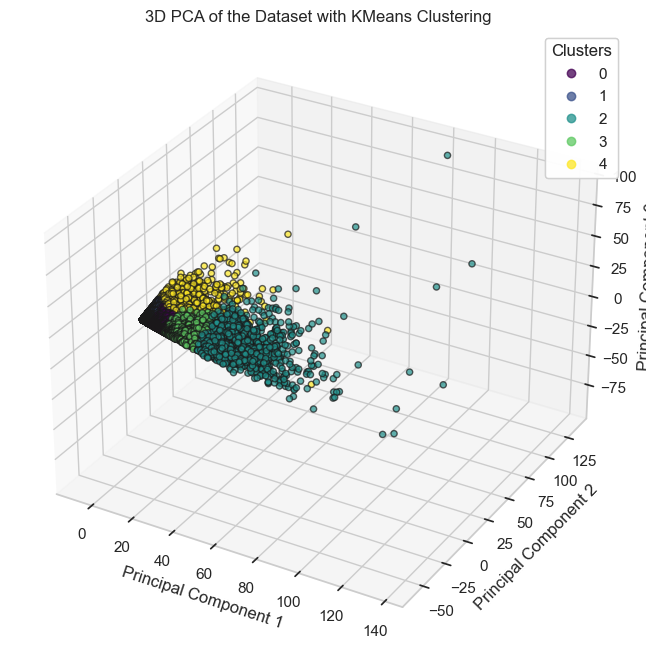

In [236]:
# using the First Three Principal Component to visualize 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA and reduce to three dimensions for 3D visualization
pca = PCA(n_components=3, random_state=100)
X_reduced = pca.fit_transform(data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans_labels = kmeans.fit_predict(X_reduced)

# 3D plot with KMeans cluster assignments
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points with KMeans cluster assignments
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], 
                     c=kmeans_labels, cmap='viridis', edgecolors='k', alpha=0.7)

# Set labels
ax.set_title('3D PCA of the Dataset with KMeans Clustering')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend with cluster labels
legend1 = ax.legend(*scatter.legend_elements(), loc="best", title="Clusters")
ax.add_artist(legend1)

# Show the plot
plt.show()


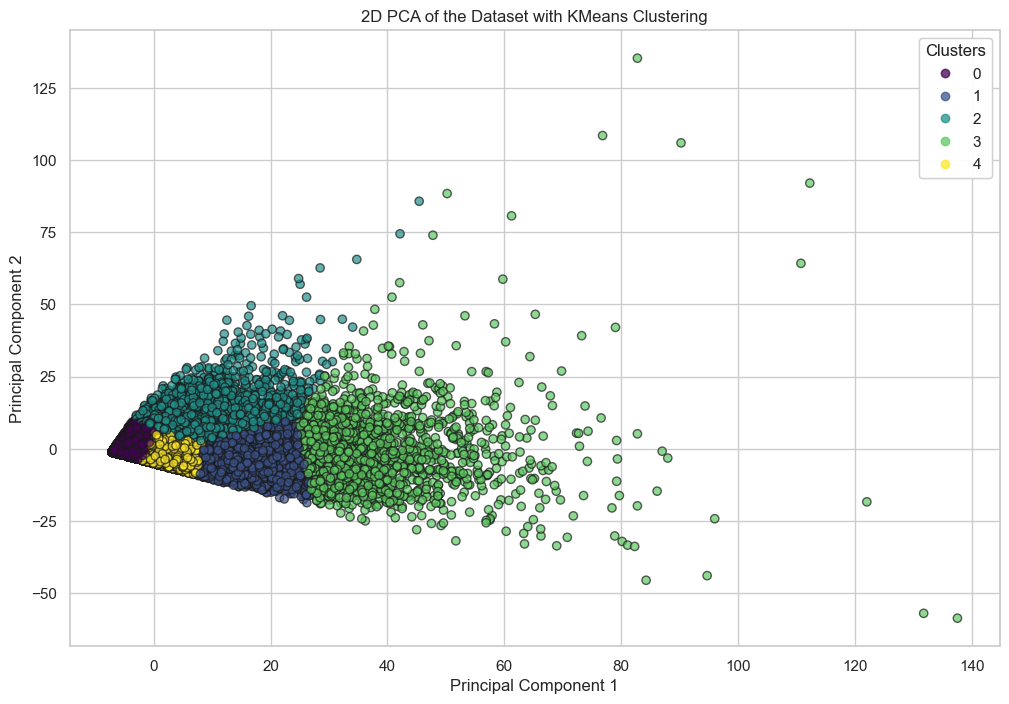

In [237]:
# Apply PCA and reduce to two dimensions for 2D visualization
pca = PCA(n_components=2, random_state=100)
X_reduced = pca.fit_transform(data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans_labels = kmeans.fit_predict(X_reduced)

# 2D plot with KMeans cluster assignments
plt.figure(figsize=(12, 8))

# Scatter plot of the data points with KMeans cluster assignments
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
                      c=kmeans_labels, cmap='viridis', edgecolor='k', alpha=0.7)

# Set labels
plt.title('2D PCA of the Dataset with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Legend with cluster labels
legend1 = plt.legend(*scatter.legend_elements(), loc="best", title="Clusters")
plt.gca().add_artist(legend1)

# Show the plot
plt.show()


In [208]:
# Calculate the average purchase volume for each cluster
cluster_means = unstacked_df.groupby('Cluster Category').mean()

# Generate recommendations based on the cluster
def get_cluster_based_recommendations(user_id, unstacked_df, cluster_means):
    # Retrieve the cluster to which the user belongs
    user_cluster = unstacked_df.loc[user_id, 'Cluster Category']
    # Get the average purchase profile within the cluster
    cluster_profile = cluster_means.loc[user_cluster]
    # Obtain the user's purchase profile, excluding non-numeric columns and cluster information
    user_profile = unstacked_df.loc[user_id, cluster_means.columns]
    # Identify product categories that the user has not yet purchased
    not_bought = user_profile[user_profile == 0]
    # Rank these categories within the cluster
    recommendations = cluster_profile[not_bought.index].sort_values(ascending=False)
    # Return the recommended product categories
    return recommendations.head().index.tolist()

# Generate recommendations for a specific user
user_id = 2  # Example user ID
recommended_items = get_cluster_based_recommendations(user_id, unstacked_df, cluster_means)

print(f"Recommended product categories for user {user_id} are: {recommended_items}")


Recommended product categories for user 2 are: ['beverages', 'frozen', 'pantry', 'bakery', 'household']
